In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import svds
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml

In [2]:
# Load Fashion-MNIST
fashion_mnist = fetch_openml("Fashion-MNIST", parser='auto')
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
X = np.array(fashion_mnist.data).T/255
y = np.array(fashion_mnist.target).astype(int)

In [3]:
# Sort by class
idx = np.argsort(y)
X, y = X[:, idx], y[idx]

In [4]:
# Compute spike eigenvectors
p, n = X.shape
_, svals, Vt = svds(X/np.sqrt(p), k=10, which='LM') # using SVD avoids computing the kernel matrix (costly)

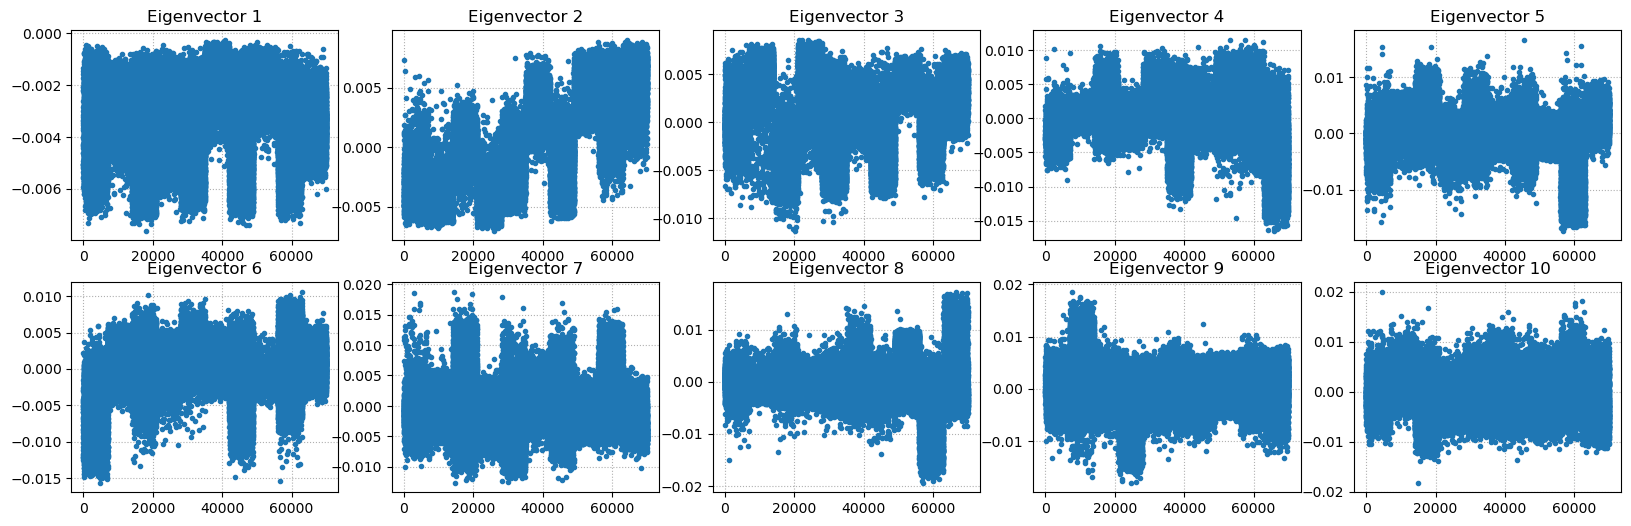

In [5]:
fig, ax = plt.subplots(2, 5, figsize=(20, 6))
for k in range(10):
    ax[k//5, k%5].plot(Vt[-k-1], ls='', marker='.')
    ax[k//5, k%5].grid(ls=':')
    ax[k//5, k%5].set_title("Eigenvector {}".format(k+1))
plt.show()

In [6]:
# Classification
kmeans = KMeans(n_clusters=10, n_init='auto').fit(Vt.T)
y_est = kmeans.labels_

In [7]:
# mat[i, j] = number of j classified as i
mat = np.zeros((10, 10))
for k in range(10):
    mask = (y == k)
    values, counts = np.unique(y_est[mask], return_counts=True)
    mat[values, k] = counts

In [8]:
# Compute error rate
argsort = np.argsort(mat.flatten())
permut, permut_inv = -np.ones(10, dtype=int), -np.ones(10, dtype=int)
i = -1
while np.any(permut == -1):
    q, r = argsort[i]//10, argsort[i]%10
    if (permut[q] == -1) and (permut_inv[r] == -1):
        permut[q], permut_inv[r] = r, q
    i -= 1
error_rate = np.mean(permut[y_est] != y)
print("Error rate: {:.2%}".format(error_rate))

Error rate: 42.46%
